## Anpassung der OCR-Parameter

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import ocrolib
from ocrolib import morph, imshow
from pylab import imread
def displaysegs(f): morph.showlabels(ocrolib.read_line_segmentation(f))
from glob import glob
from IPython.display import display, Image

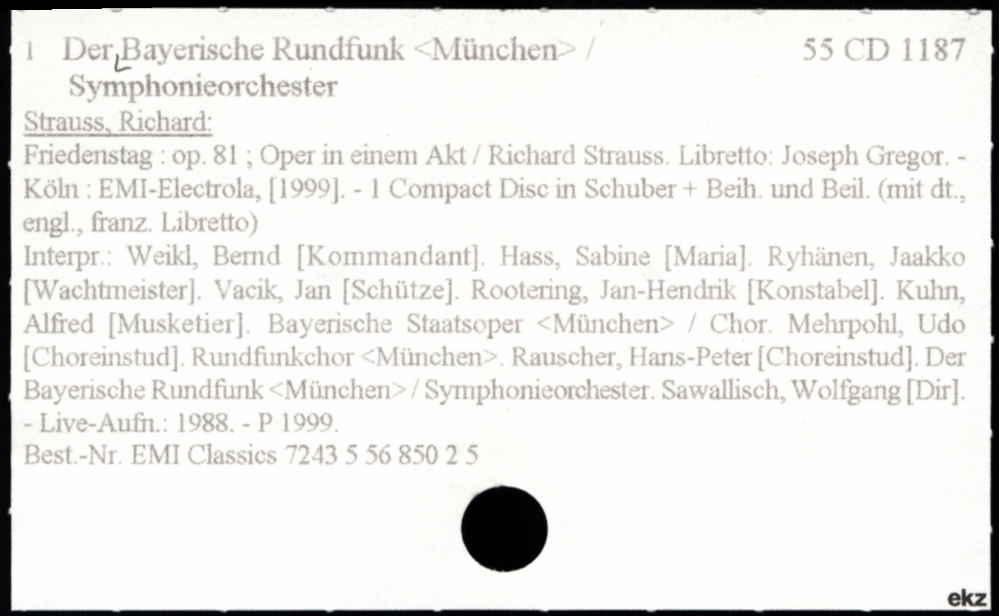

In [5]:
from IPython.display import Image
Image(filename='../catalog-testset/SD00200000205.png') 

INFO:  #../catalog-testset/SD/SD00200000528.png
INFO:  === ../catalog-testset/SD/SD00200000528.png 1
INFO:  flattening
INFO:  estimating skew angle
INFO:  estimating thresholds
INFO:  rescaling
INFO:  ../catalog-testset/SD/SD00200000528.png lo-hi (0.73 1.11) angle  0.1
INFO:  writing


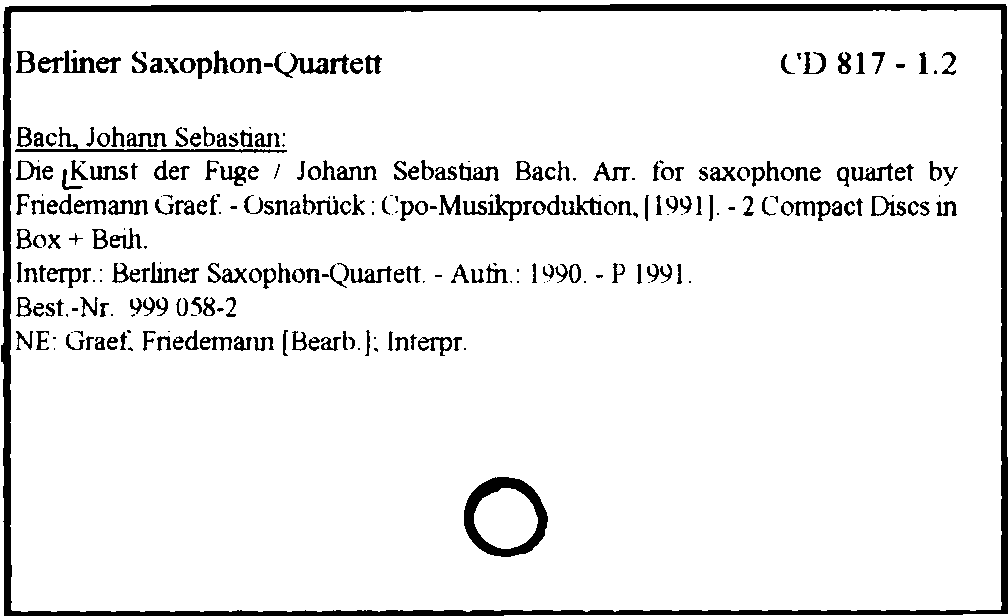

In [18]:
!ocropus-nlbin -t 0.5 -z 1.0 ../catalog-testset/SD/SD00200000528.png
display(Image(filename='../catalog-testset/SD/SD00200000528.bin.png'))

INFO:  
INFO:  ########## /home/jakob/anaconda/bin/ocropus-gpageseg --maxcolseps 0 --u
INFO:  
INFO:  ../catalog-testset/SD/SD00200000528.bin.png
INFO:  scale 16.7332005307
INFO:  computing segmentation
INFO:  computing column separators
INFO:  computing lines
INFO:  propagating labels
INFO:  spreading labels
INFO:  number of lines8
INFO:  finding reading order
INFO:  writing lines
INFO:       7 ../catalog-testset/SD/SD00200000528.bin.png 16.7  8


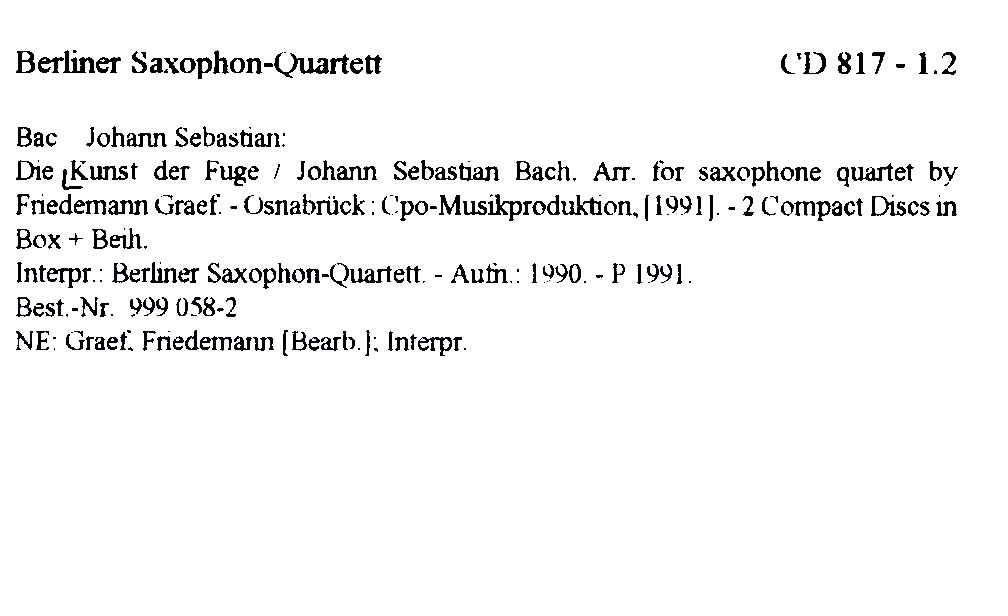

010001.bin.png	   010004.gt.txt      010007.txt	 01000a.txt.gt.txt
010001.gt.txt	   010004.txt	      010007.txt.gt.txt  01000b.bin.png
010001.txt	   010004.txt.gt.txt  010008.bin.png	 01000b.gt.txt
010001.txt.gt.txt  010005.bin.png     010008.gt.txt	 01000b.txt
010002.bin.png	   010005.gt.txt      010008.txt	 01000b.txt.gt.txt
010002.gt.txt	   010005.txt	      010008.txt.gt.txt  01000c.bin.png
010002.txt	   010005.txt.gt.txt  010009.bin.png	 01000c.gt.txt
010002.txt.gt.txt  010006.bin.png     010009.gt.txt	 01000c.txt
010003.bin.png	   010006.gt.txt      010009.txt	 01000c.txt.gt.txt
010003.gt.txt	   010006.txt	      010009.txt.gt.txt  01000d.bin.png
010003.txt	   010006.txt.gt.txt  01000a.bin.png
010003.txt.gt.txt  010007.bin.png     01000a.gt.txt
010004.bin.png	   010007.gt.txt      01000a.txt


In [19]:
!ocropus-gpageseg --maxcolseps 0 --usegauss -z 1.0 ../catalog-testset/SD/SD00200000528.bin.png
display(Image(filename='../catalog-testset/SD/SD00600000350.pseg.png'))
!ls ../catalog-testset/SD/SD00200000003/

../catalog-testset/SD/SD00600000026/010005.bin.png


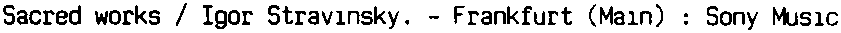

../catalog-testset/SD/SD00600000026/01000a.bin.png


../catalog-testset/SD/SD00600000026/010001.bin.png


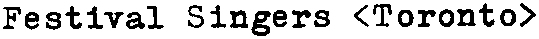

../catalog-testset/SD/SD00600000026/010007.bin.png


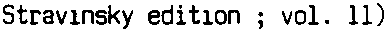

../catalog-testset/SD/SD00600000026/01000c.bin.png


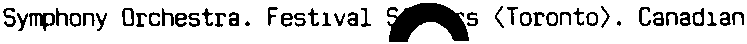

../catalog-testset/SD/SD00600000026/01000b.bin.png


../catalog-testset/SD/SD00600000026/010003.bin.png


../catalog-testset/SD/SD00600000026/010008.bin.png


../catalog-testset/SD/SD00600000026/010006.bin.png


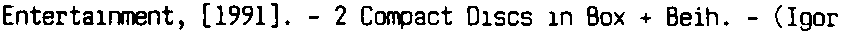

../catalog-testset/SD/SD00600000026/010002.bin.png


../catalog-testset/SD/SD00600000026/010009.bin.png


../catalog-testset/SD/SD00600000026/010004.bin.png


In [14]:


# plt.figure(figsize=(12,8))

segments = glob('../catalog-testset/SD/SD00600000026/??????.bin.png')
for i, s in enumerate(segments):
#     plt.subplot(8,1,i+1)
    print s
    display(Image(filename=s))
    

In [53]:
glob('../catalog-testset/SD/SD00200000003/*')

['../catalog-testset/SD/SD00200000003/01000b.txt',
 '../catalog-testset/SD/SD00200000003/010003.txt.gt.txt',
 '../catalog-testset/SD/SD00200000003/01000c.txt.gt.txt',
 '../catalog-testset/SD/SD00200000003/010005.bin.png',
 '../catalog-testset/SD/SD00200000003/010009.txt',
 '../catalog-testset/SD/SD00200000003/010006.txt',
 '../catalog-testset/SD/SD00200000003/01000a.bin.png',
 '../catalog-testset/SD/SD00200000003/010008.txt.gt.txt',
 '../catalog-testset/SD/SD00200000003/01000d.bin.png',
 '../catalog-testset/SD/SD00200000003/010002.txt.gt.txt',
 '../catalog-testset/SD/SD00200000003/010001.bin.png',
 '../catalog-testset/SD/SD00200000003/010007.bin.png',
 '../catalog-testset/SD/SD00200000003/01000c.bin.png',
 '../catalog-testset/SD/SD00200000003/010003.txt',
 '../catalog-testset/SD/SD00200000003/010008.txt',
 '../catalog-testset/SD/SD00200000003/01000a.txt',
 '../catalog-testset/SD/SD00200000003/010007.txt.gt.txt',
 '../catalog-testset/SD/SD00200000003/010007.txt',
 '../catalog-testset/SD

In [37]:
?commonprefix
origin = '../catalog-gt/SD/SD00200000245/010002.gt.txt'

prefix = commonprefix([origin, base])
target = join(target_base, origin[len(base):])
target

'../eval-ocr/SD/SD00200000245/010002.gt.txt'

In [80]:
origin

'../catalog-gt/SD/SD00200000245/010002.gt.txt'

In [13]:
from os.path import join, split, splitext,commonprefix, isdir
from os import makedirs, listdir
from glob import glob
import subprocess

def remove_ext(name):
    return name[:name.index('.')]
#  ../catalog-testset/SD/SD00200000003/*.gt.txt
def copyTo( base, target_base, pattern, id_filter=None, ext='.txt'):
    files = glob(join(base, pattern))
    print id_filter
    for f in files:
        if id_filter and not (split(split(f)[0])[1] in id_filter):
#             print split(split(f)[0])[1]
            continue
        prefix = commonprefix([f, base])
        target = join(target_base, f[len(base):])
        target = join(split(target)[0], remove_ext(split(target)[1]) + ext)
        if not isdir(split(target)[0]):
            makedirs(split(target)[0])
        p = ['cp', f, target]
        print ' '.join(p)
        subprocess.check_output(p)
# !ls ../catalog-testset/SD/SD00200000003/
copyTo('../catalog-gt/SD/', '../catalog-evaluation/', '*/*.gt.txt',ext='.gt.txt')
copyTo('../tesseract-result-dict2/', '../catalog-evaluation/', '*/*.txt', listdir(join('../catalog-gt/','SD')))

None
cp ../catalog-gt/SD/SD00200000245/010002.gt.txt ../catalog-evaluation/SD00200000245/010002.gt.txt
cp ../catalog-gt/SD/SD00200000245/010001.gt.txt ../catalog-evaluation/SD00200000245/010001.gt.txt
cp ../catalog-gt/SD/SD00200000245/010004.gt.txt ../catalog-evaluation/SD00200000245/010004.gt.txt
cp ../catalog-gt/SD/SD00200000245/010005.gt.txt ../catalog-evaluation/SD00200000245/010005.gt.txt
cp ../catalog-gt/SD/SD00200000245/010006.gt.txt ../catalog-evaluation/SD00200000245/010006.gt.txt
cp ../catalog-gt/SD/SD00200000245/010003.gt.txt ../catalog-evaluation/SD00200000245/010003.gt.txt
cp ../catalog-gt/SD/SD00200000003/010002.gt.txt ../catalog-evaluation/SD00200000003/010002.gt.txt
cp ../catalog-gt/SD/SD00200000003/010001.gt.txt ../catalog-evaluation/SD00200000003/010001.gt.txt
cp ../catalog-gt/SD/SD00200000003/010007.gt.txt ../catalog-evaluation/SD00200000003/010007.gt.txt
cp ../catalog-gt/SD/SD00200000003/01000c.gt.txt ../catalog-evaluation/SD00200000003/01000c.gt.txt
cp ../catalog-g

In [75]:
id_filter= listdir(join(base,'SD'))
f = '../catalog-gt/SD/SD00200000245/010006.gt.txt'
f

'../catalog-gt/SD/SD00200000245/010006.gt.txt'

In [47]:
join(base,'SD/*/*.txt')

'../catalog-gt/SD/*/*.txt'

In [51]:
!ocropus-rpred -Q 7 -m ../ocropy/models/en-default.pyrnn.gz '../catalog-testset/SD/SD00200000003/??????.bin.png'

INFO:  
INFO:  ########## /home/jakob/anaconda/bin/ocropus-rpred -Q 7 -m ../ocropy/mod
INFO:  
INFO:  #inputs13
# loading object ../ocropy/models/en-default.pyrnn.gz
INFO:  ../catalog-testset/SD/SD00200000003/010004.bin.png:Edition Bartbarossa.
INFO:  ../catalog-testset/SD/SD00200000003/010005.bin.png:Vol. 4, - [1996]. - 1 Compact Disc Beih.
INFO:  ../catalog-testset/SD/SD00200000003/010003.bin.png:8393 : Hit-Raritäten aus dem DOR-Rundfunkarchiv. - Berlin :
INFO:  ../catalog-testset/SD/SD00200000003/010007.bin.png:Hoffnung. Fort für einen Abend. Welt im Sand. Weisst du noch.
INFO:  ../catalog-testset/SD/SD00200000003/010006.bin.png:Enth.: Jagd auf Liebe. Steigen Netxel. u Fuss. Tshgiten-Legende.
INFO:  ../catalog-testset/SD/SD00200000003/010001.bin.png:Babylon
INFO:  ../catalog-testset/SD/SD00200000003/010002.bin.png:55 CD 289 - 4
ERROR:  ../catalog-testset/SD/SD00200000003/01000d.bin.png SKIPPED line too short (28, 36) (use -n to disable this check)
INFO:  ../catalog-testset/SD/SD0020

In [14]:
!ocropus-errs  '../catalog-evaluation/*/??????.gt.txt'

     0	     7	../catalog-evaluation/SD00200000003/010001.gt.txt
     0	    13	../catalog-evaluation/SD00200000003/010002.gt.txt
     1	    64	../catalog-evaluation/SD00200000003/010003.gt.txt
     1	    19	../catalog-evaluation/SD00200000003/010004.gt.txt
     2	    42	../catalog-evaluation/SD00200000003/010005.gt.txt
     6	    63	../catalog-evaluation/SD00200000003/010006.gt.txt
     4	    61	../catalog-evaluation/SD00200000003/010007.gt.txt
     1	    65	../catalog-evaluation/SD00200000003/010008.gt.txt
     5	    59	../catalog-evaluation/SD00200000003/010009.gt.txt
     7	    61	../catalog-evaluation/SD00200000003/01000a.gt.txt
     4	    13	../catalog-evaluation/SD00200000003/01000b.gt.txt
    11	    54	../catalog-evaluation/SD00200000003/01000c.gt.txt
     2	    37	../catalog-evaluation/SD00200000245/010001.gt.txt
     6	    37	../catalog-evaluation/SD00200000245/010002.gt.txt
     2	     6	../catalog-evaluation/SD00200000245/010003.gt.txt
     6	    26	../catalog-evaluation/SD00

In [15]:
!ocropus-econf '../catalog-evaluation/*/??????.gt.txt'

errors         192
missing          0
total         2457
err          7.814 %
errnomiss    7.814 %
11	l	i
4	3	J
4	_	 
4	 	_
3	_	.
3	é	á
3	.	_
2	 	g
2	c	e
2	m_	in
0.0781440781441


In [40]:
%%capture output
import datetime as dt
before = dt.datetime.now()

!ocropus-nlbin -t 0.5 -z 1.0 ../catalog-testset/SD???????????.png
!ocropus-gpageseg --maxcolseps 0 --usegauss -z 1.0 ../catalog-testset/SD???????????.bin.png
!ocropus-rpred -q -Q 7 -m ../ocropy/models/en-default.pyrnn.gz '../catalog-testset/SD???????????/??????.bin.png'

delta = dt.datetime.now() - before
delta.total_seconds()

971.727955

In [62]:
print str(delta / len(glob('../catalog-testset/SD???????????.png')))
print str(delta / len(glob('../catalog-testset/SD???????????.png')) * 1000000)

0:00:04.858639
56 days, 5:37:19


In [58]:
str(delta / 200)

'0:00:04.858639'